# The Excellent Store Challenge

## Introduction

The CEO of The Excellent Store, Chief A. A. Babatunji, plans to expand the chain of stores to more Nigerian cities in 2025. However, as the COVID19 restrictions have affected the retail business, he sees the need to better understand which products return higher profits at specific stores so as to inform the expansion plan.

I have been engaged as the new Retail Data Analyst to build a predictive model and find out the profit returns on each product at a particular store. The scenario he sees is where a brand of juice sold for N250 in one of his store branches may also be sold at N230 at another store within Chief Babatunji's chain of stores. He needs to therefore understand what type of product, market clusters and store type (location, age, size) will give more profit returns as he plans to expand to more cities in the country.

From my predictions, Chief Babatunji will understand the key characteristics of items and stores, which drive returns and have better insight on how to proceed with the plan of expansion.


## Data Description

The dataset includes 13 variables, consisting of 5 numeric variables and 8 categorical variables. Below are the definitions and descriptions of each variable:

- Item_ID: Unique product ID
- Item_Weight: Weight of the product
- Item_Sugar_Content: Sugar content of the product
- Item_Visibility: The percentage of total display area of all products in Chief Babatunji’s supermarket allocated to the particular product
- Item_Type: The category to which the product belongs
- Item_Price: Retail price of the product
- Store_ID: Unique store ID
- Store_Start_Year: The year in which store was opened
- Store_Size: The size of the store in terms of total ground area covered
- Store_Location_Type: The type of city in which the store is located
- Store_Type: Description of the store based on category of items sold
- Item_Store_ID: Unique identifier of each product type per supermarket.
- Item_Store_Returns: Profit returns on the product in the particular store. This is the outcome variable to be predicted.

## Importing Libraries

In [ ]:
# !pip install verstack -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.5/230.5 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 17.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Loading the Data

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Zindi/DSN AI Classes 2025/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Zindi/DSN AI Classes 2025/test.csv')

In [ ]:
train.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [ ]:
test.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type
0,DRA59,BABATUNJI010,DRA59_BABATUNJI010,8.270,Normal Sugar,0.214125,Soft Drinks,459.98,2005,NaN,Cluster 3,Grocery Store
1,DRA59,BABATUNJI013,DRA59_BABATUNJI013,8.270,Normal Sugar,0.127821,Soft Drinks,464.98,1994,High,Cluster 3,Supermarket Type1
2,DRB01,BABATUNJI013,DRB01_BABATUNJI013,7.390,Low Sugar,0.082171,Soft Drinks,477.38,1994,High,Cluster 3,Supermarket Type1
3,DRB13,BABATUNJI010,DRB13_BABATUNJI010,6.115,Normal Sugar,0.011791,Soft Drinks,472.63,2005,NaN,Cluster 3,Grocery Store
4,DRB13,BABATUNJI013,DRB13_BABATUNJI013,6.115,Normal Sugar,0.007038,Soft Drinks,473.13,1994,High,Cluster 3,Supermarket Type1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              4990 non-null   object 
 1   Store_ID             4990 non-null   object 
 2   Item_Store_ID        4990 non-null   object 
 3   Item_Weight          4188 non-null   float64
 4   Item_Sugar_Content   4990 non-null   object 
 5   Item_Visibility      4990 non-null   float64
 6   Item_Type            4990 non-null   object 
 7   Item_Price           4990 non-null   float64
 8   Store_Start_Year     4990 non-null   int64  
 9   Store_Size           3540 non-null   object 
 10  Store_Location_Type  4990 non-null   object 
 11  Store_Type           4990 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532 entries, 0 to 3531
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              3532 non-null   object 
 1   Store_ID             3532 non-null   object 
 2   Item_Store_ID        3532 non-null   object 
 3   Item_Weight          2871 non-null   float64
 4   Item_Sugar_Content   3532 non-null   object 
 5   Item_Visibility      3532 non-null   float64
 6   Item_Type            3532 non-null   object 
 7   Item_Price           3532 non-null   float64
 8   Store_Start_Year     3532 non-null   int64  
 9   Store_Size           2573 non-null   object 
 10  Store_Location_Type  3532 non-null   object 
 11  Store_Type           3532 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 331.3+ KB


## Exploratory Data Analysis

First, we view the correlation between the numerical columns.

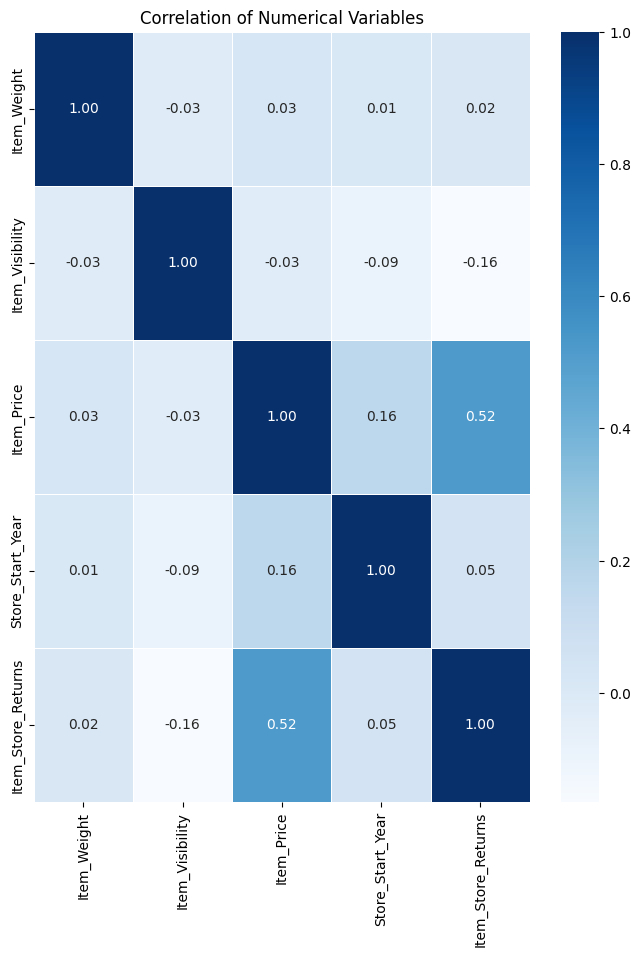

In [ ]:
train_corr = train[['Item_Weight', 'Item_Visibility', 'Item_Price', 'Store_Start_Year', 'Item_Store_Returns']].corr()

plt.figure(figsize=(8,10))
sns.heatmap(train_corr, annot= True, cmap= 'Blues', fmt= '.2f', linewidths=0.5)
plt.title('Correlation of Numerical Variables')
plt.show()

Next, we look at the distribution of the numerical variables.

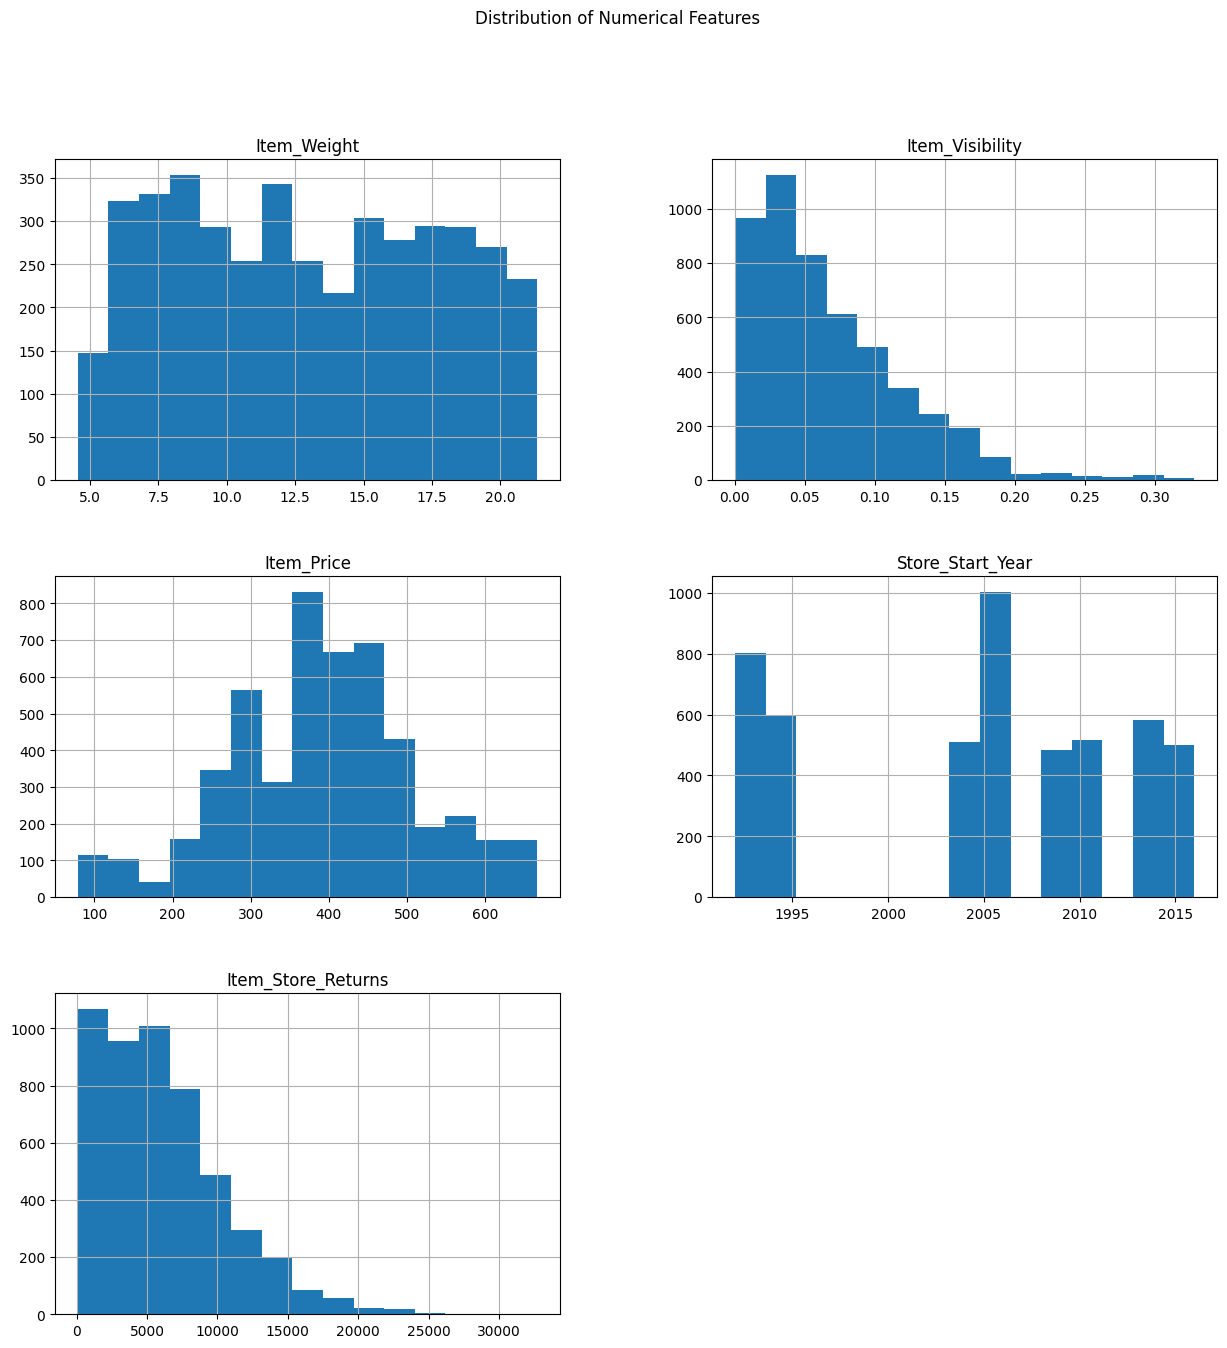

In [ ]:
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_Price', 'Store_Start_Year', 'Item_Store_Returns']
train[numerical_features].hist(figsize=(15, 15), bins=15)
plt.suptitle('Distribution of Numerical Features')
plt.show()

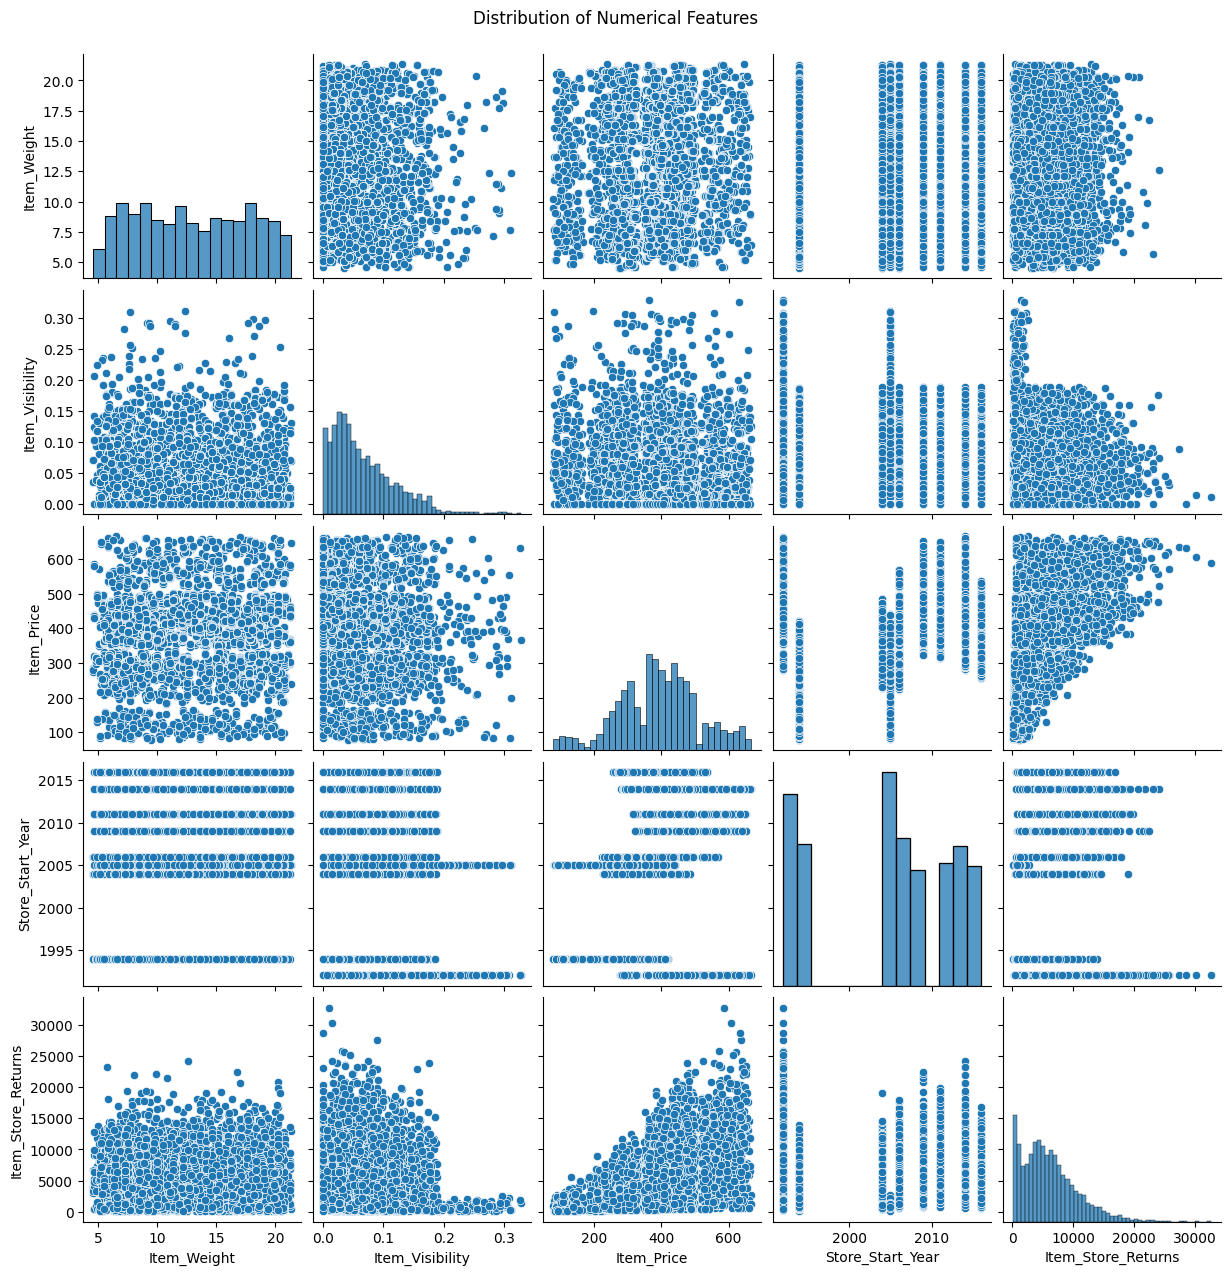

In [ ]:
sns.pairplot(train[numerical_features])
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.show()

Next, we look at the outliers of the numerical columns using boxplot.

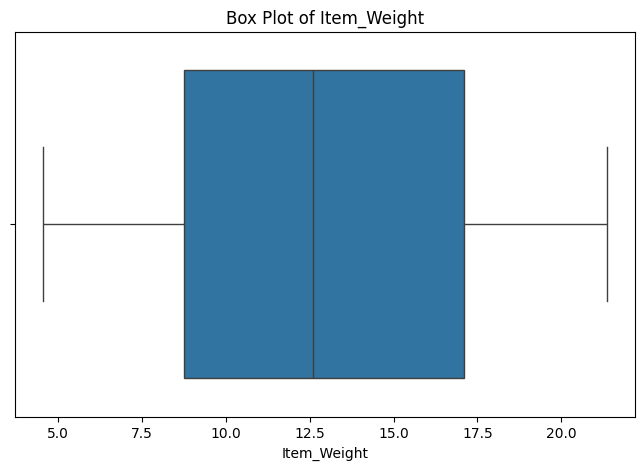

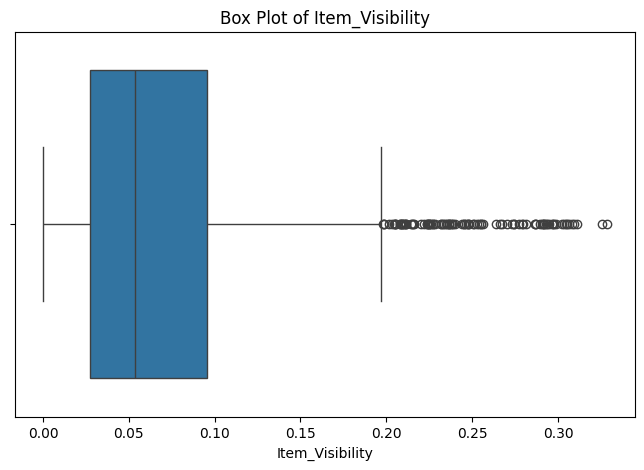

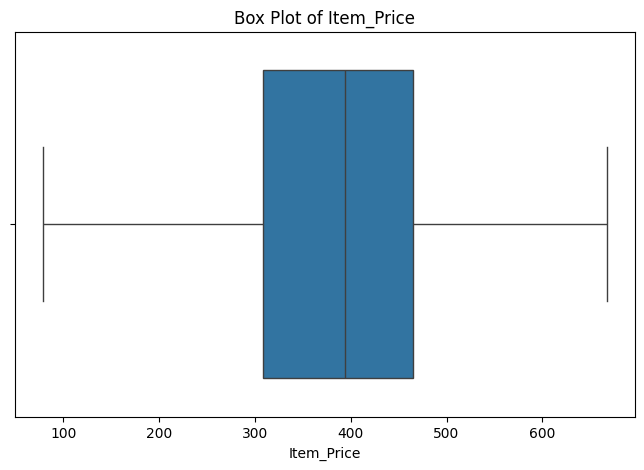

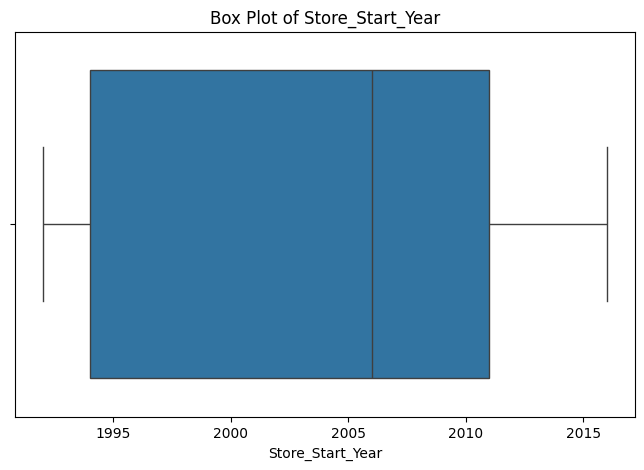

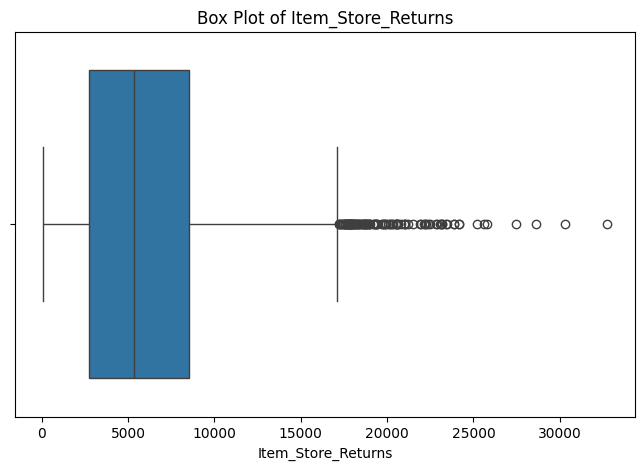

In [ ]:
for col in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=col, data=train)
    plt.title(f'Box Plot of {col}')
    plt.show()

We plot the distribution of the categorical variables.

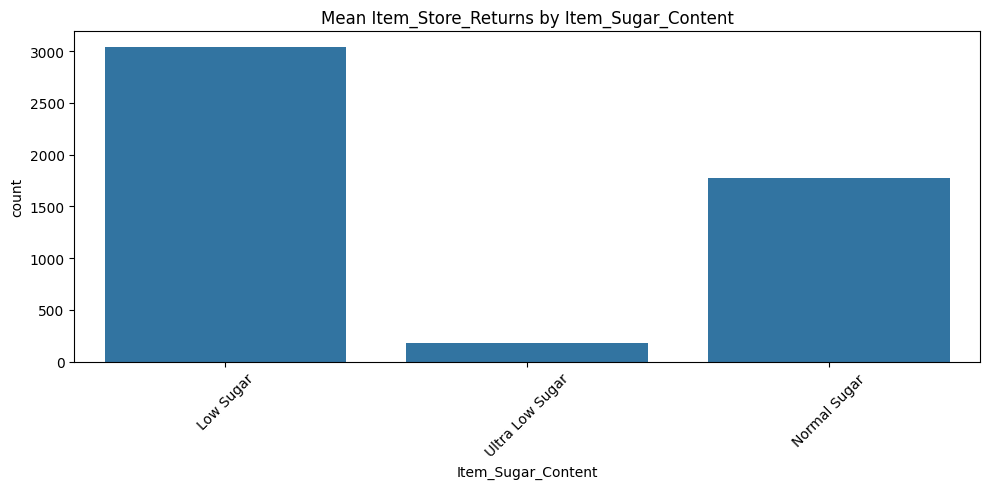

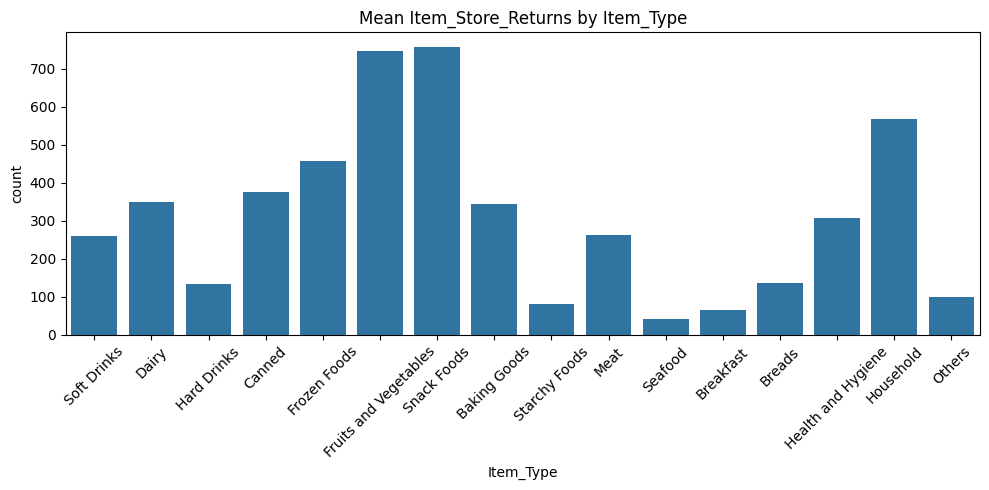

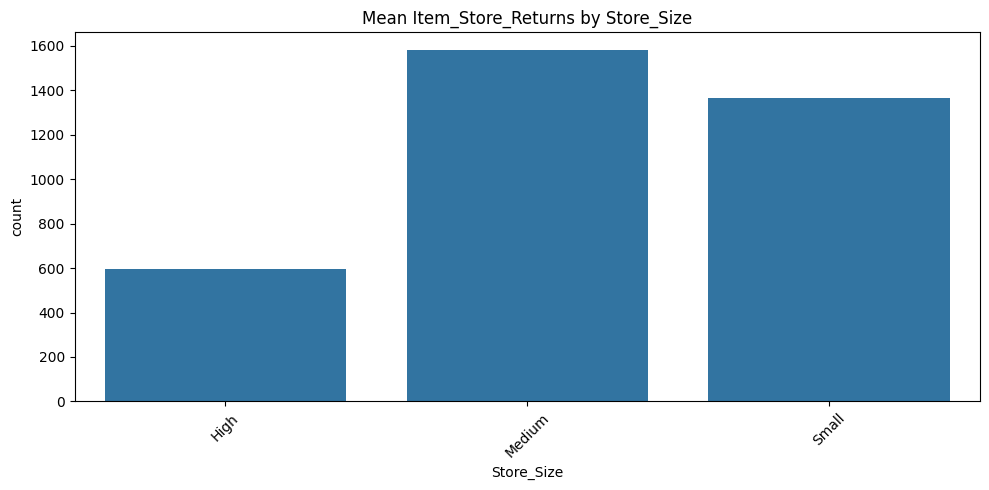

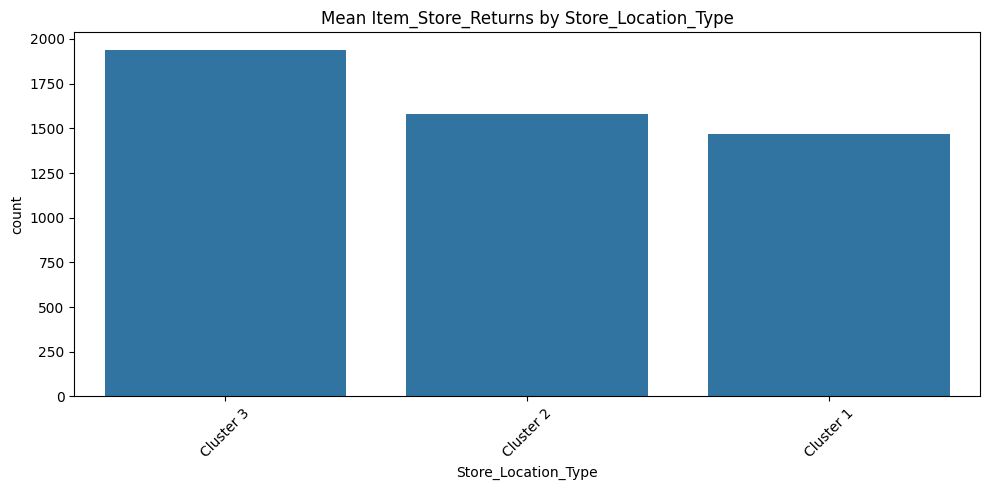

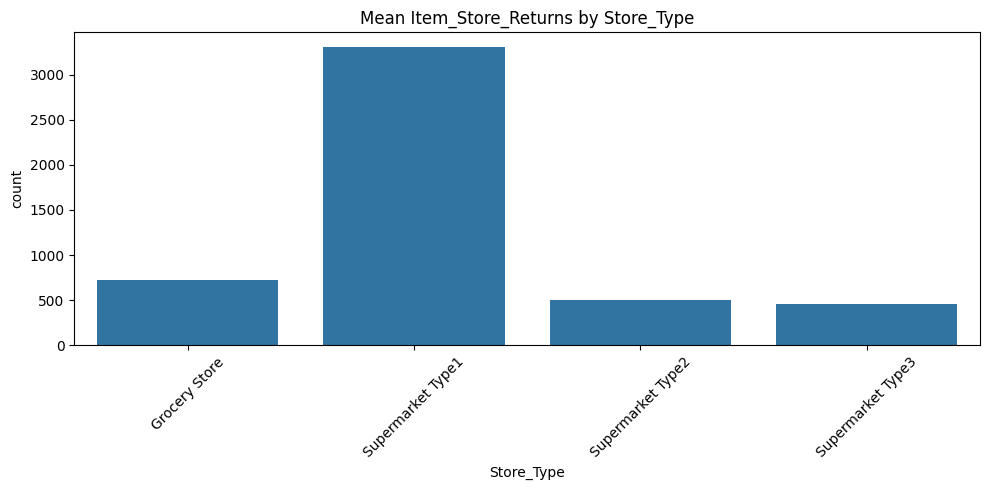

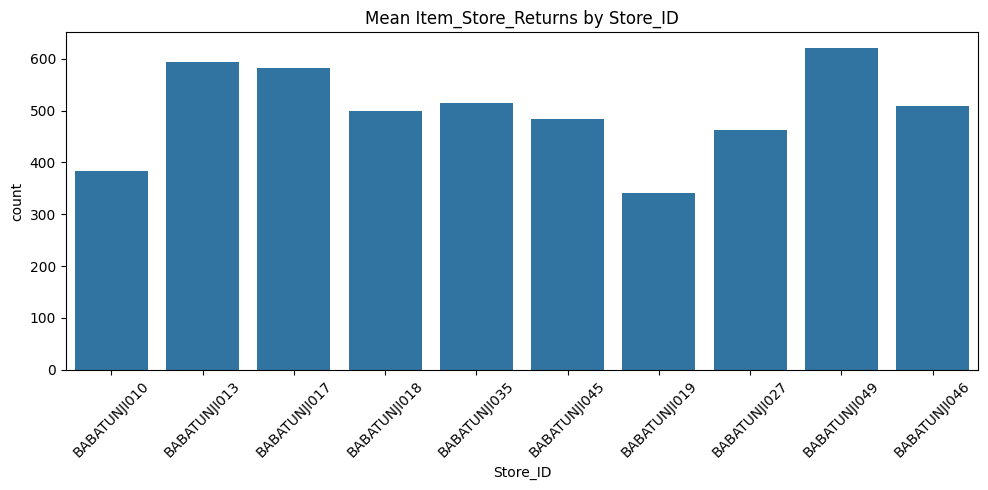

In [ ]:
categorical_features = ['Item_Sugar_Content', 'Item_Type', 'Store_Size',
                                 'Store_Location_Type', 'Store_Type', 'Store_ID']
target = 'Item_Store_Returns'

for col in categorical_features:
      plt.figure(figsize=(10, 5))
      sns.countplot(x=col, data=train)
      plt.title(f'Mean {target} by {col}')
      plt.xticks(rotation=45)
      plt.tight_layout()
      plt.show()

In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_Price,Store_Start_Year,Item_Store_Returns
count,4188.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164
std,4.703256,0.053058,119.378259,8.283151,4447.333835
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.767500,0.027273,307.890000,1994.000000,2757.660000
50%,12.600000,0.053564,393.860000,2006.000000,5374.675000
75%,17.100000,0.095358,465.067500,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000


## Data Preprocessing

In [ ]:
# Dropping target variable from training data
target = train['Item_Store_Returns']
train1 = train.drop('Item_Store_Returns', axis=1)

In [ ]:
# Combine train and test data for uniform processing
data = pd.concat([train1, test], sort=False).reset_index(drop=True)
data.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8522 entries, 0 to 8521
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              8522 non-null   object 
 1   Store_ID             8522 non-null   object 
 2   Item_Store_ID        8522 non-null   object 
 3   Item_Weight          7059 non-null   float64
 4   Item_Sugar_Content   8522 non-null   object 
 5   Item_Visibility      8522 non-null   float64
 6   Item_Type            8522 non-null   object 
 7   Item_Price           8522 non-null   float64
 8   Store_Start_Year     8522 non-null   int64  
 9   Store_Size           6113 non-null   object 
 10  Store_Location_Type  8522 non-null   object 
 11  Store_Type           8522 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 799.1+ KB


We impute the missing values using NaNImputer.

In [ ]:
from verstack import NaNImputer

In [ ]:
# Instantiate the library
imputer = NaNImputer()
df = imputer.impute(data)


 * Initiating NaNImputer.impute
     . Dataset dimensions:
     .. rows:         8522
     .. columns:      12
     .. mb in memory: 0.78
     .. NaN cols num: 2

   - Drop hopeless NaN cols

   - Processing whole data for imputation

   - Imputing single core 2 cols
     . Imputed (regression) - 1463     NaN in Item_Weight
     . Imputed (multiclass) - 2409     NaN in Store_Size

   - Missing values after imputation: 0
'NaNImputer.impute()' executed in 3.1036 seconds


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8522 entries, 0 to 8521
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              8522 non-null   object 
 1   Store_ID             8522 non-null   object 
 2   Item_Store_ID        8522 non-null   object 
 3   Item_Weight          8522 non-null   float64
 4   Item_Sugar_Content   8522 non-null   object 
 5   Item_Visibility      8522 non-null   float64
 6   Item_Type            8522 non-null   object 
 7   Item_Price           8522 non-null   float64
 8   Store_Start_Year     8522 non-null   int64  
 9   Store_Size           8522 non-null   object 
 10  Store_Location_Type  8522 non-null   object 
 11  Store_Type           8522 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 799.1+ KB


In [ ]:
df.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,High,Cluster 3,Grocery Store
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,Small,Cluster 2,Supermarket Type1
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1


Item Visibility has outliers. This is correlected using q-q plot.

In [ ]:
import scipy.stats as stat
import pylab

In [ ]:
# Create a function for q-q plot
def plot_data(df, feature):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  df[feature].hist()
  plt.subplot(1,2,2)
  stat.probplot(df[feature], dist= 'norm', plot= pylab)
  plt.show()

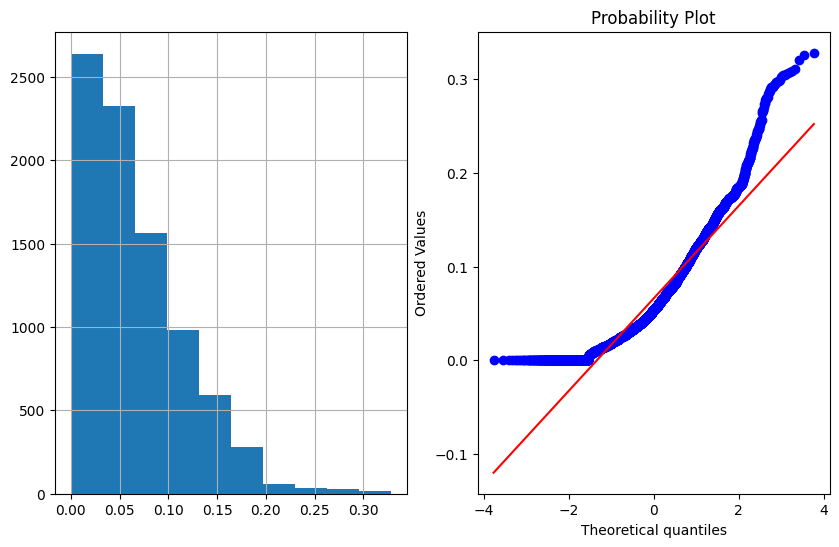

In [ ]:
item = plot_data(df, 'Item_Visibility')
item

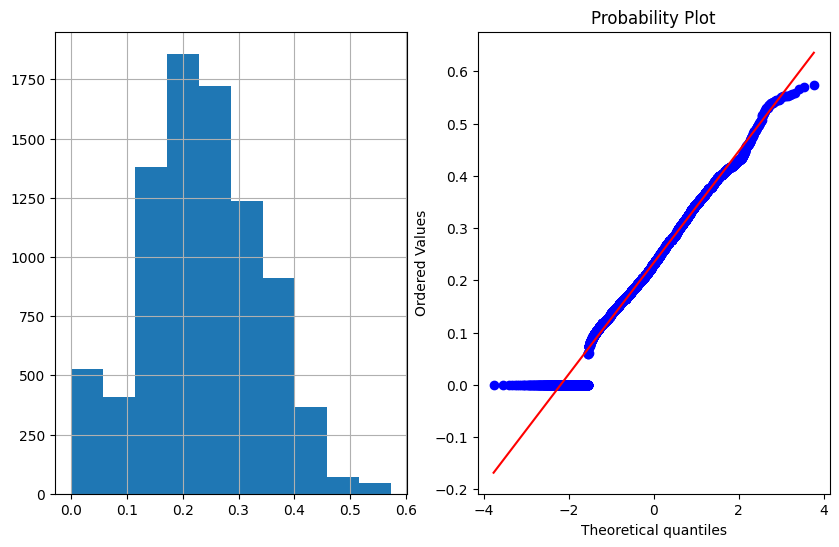

In [ ]:
df['Item_Visibility_sqrt'] = np.sqrt(df['Item_Visibility'])
vis = plot_data(df, 'Item_Visibility_sqrt')
vis

Next, we transform the store year to store age

In [ ]:
from datetime import datetime

In [ ]:
df['Store_Age'] = datetime.now().year - df['Store_Start_Year']
df.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Visibility_sqrt,Store_Age
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,High,Cluster 3,Grocery Store,0.261792,20
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,0.202267,31
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,Small,Cluster 2,Supermarket Type1,0.202922,11
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,0.202763,9
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,0.000000,14


The item price will be transformed by using its square root.

In [ ]:
df['Item_Price_Transformed'] = np.sqrt(df[['Item_Price']])
df.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Visibility_sqrt,Store_Age,Item_Price_Transformed
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,High,Cluster 3,Grocery Store,0.261792,20,18.908728
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,0.202267,31,18.862396
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,Small,Cluster 2,Supermarket Type1,0.202922,11,18.729389
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,0.202763,9,18.842505
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,0.000000,14,18.835870


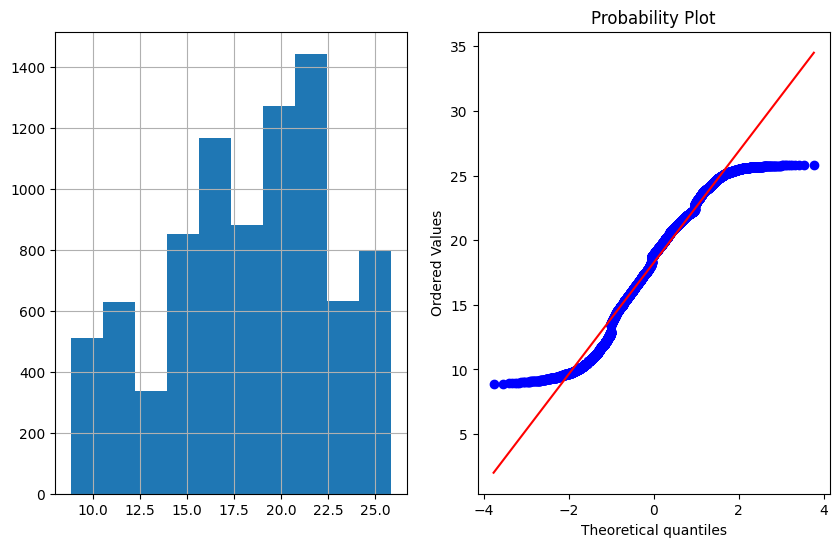

In [ ]:
ite= plot_data(df, 'Item_Price_Transformed')
ite

We will transform the item weight by dividing the item price by the item weight.

In [ ]:
df['Item_Price_per_weight'] = np.sqrt(df['Item_Price'] / df['Item_Weight'])
df.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Visibility_sqrt,Store_Age,Item_Price_Transformed,Item_Price_per_weight
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,High,Cluster 3,Grocery Store,0.261792,20,18.908728,5.551794
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,0.202267,31,18.862396,5.538190
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,Small,Cluster 2,Supermarket Type1,0.202922,11,18.729389,5.499138
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,0.202763,9,18.842505,5.532350
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,0.000000,14,18.835870,5.530402


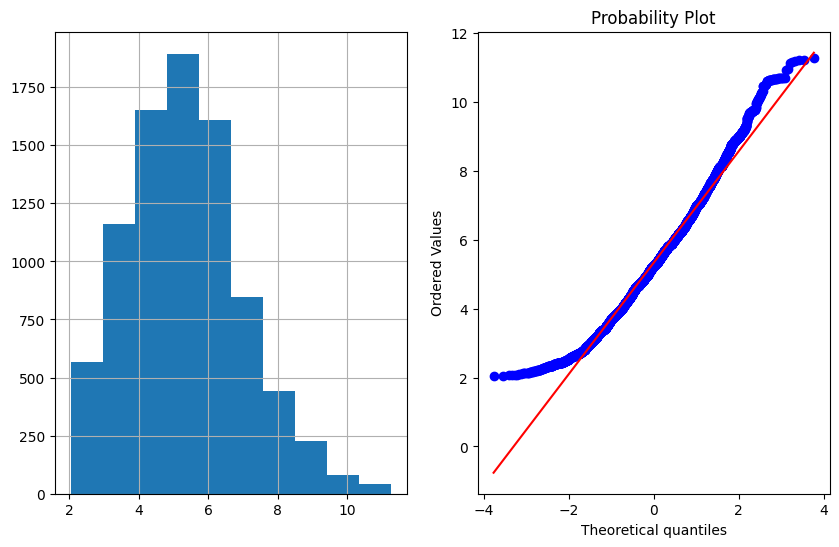

In [ ]:
it= plot_data(df, 'Item_Price_per_weight')
it

From domain knowledge, The item sugar content and item type has no impact on the target variable.

In [ ]:
# Drop the item sugar content and item type
df = df.drop(['Item_Sugar_Content', 'Item_Type'], axis=1)
df.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Visibility,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Visibility_sqrt,Store_Age,Item_Price_Transformed,Item_Price_per_weight
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,0.068535,357.54,2005,High,Cluster 3,Grocery Store,0.261792,20,18.908728,5.551794
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,0.040912,355.79,1994,High,Cluster 3,Supermarket Type1,0.202267,31,18.862396,5.538190
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,0.041178,350.79,2014,Small,Cluster 2,Supermarket Type1,0.202922,11,18.729389,5.499138
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,0.041113,355.04,2016,Medium,Cluster 3,Supermarket Type2,0.202763,9,18.842505,5.532350
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,0.000000,354.79,2011,Small,Cluster 2,Supermarket Type1,0.000000,14,18.835870,5.530402


The Store Size, Store Type and Store Location is encoded using one-hot encoder.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Instantiate encoder
encoder = OneHotEncoder(sparse_output=False)

# Fit-transform and create DataFrame
encoded_array = encoder.fit_transform(df[['Store_Size', 'Store_Type', 'Store_Location_Type']])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Store_Size', 'Store_Type', 'Store_Location_Type']))
encoded_df.head()


,Store_Size_High,Store_Size_Medium,Store_Size_Small,Store_Type_Grocery Store,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Store_Type_Supermarket Type3,Store_Location_Type_Cluster 1,Store_Location_Type_Cluster 2,Store_Location_Type_Cluster 3
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_encoded = pd.concat([df, encoded_df], axis=1)
df_encoded.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Visibility,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,...,Store_Size_High,Store_Size_Medium,Store_Size_Small,Store_Type_Grocery Store,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Store_Type_Supermarket Type3,Store_Location_Type_Cluster 1,Store_Location_Type_Cluster 2,Store_Location_Type_Cluster 3
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,0.068535,357.54,2005,High,Cluster 3,Grocery Store,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,0.040912,355.79,1994,High,Cluster 3,Supermarket Type1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,0.041178,350.79,2014,Small,Cluster 2,Supermarket Type1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,0.041113,355.04,2016,Medium,Cluster 3,Supermarket Type2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,0.000000,354.79,2011,Small,Cluster 2,Supermarket Type1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8522 entries, 0 to 8521
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_ID                        8522 non-null   object 
 1   Store_ID                       8522 non-null   object 
 2   Item_Store_ID                  8522 non-null   object 
 3   Item_Weight                    8522 non-null   float64
 4   Item_Visibility                8522 non-null   float64
 5   Item_Price                     8522 non-null   float64
 6   Store_Start_Year               8522 non-null   int64  
 7   Store_Size                     8522 non-null   object 
 8   Store_Location_Type            8522 non-null   object 
 9   Store_Type                     8522 non-null   object 
 10  Item_Visibility_sqrt           8522 non-null   float64
 11  Store_Age                      8522 non-null   int64  
 12  Item_Price_Transformed         8522 non-null   f

In [ ]:
# Split the combined data back into train and test sets
training = df_encoded.iloc[:train.shape[0], :]
testing = df_encoded.iloc[train.shape[0]:, :]

# Drop the some columns
training = training.drop(['Item_ID', 'Store_ID', 'Item_Weight',
       'Item_Visibility', 'Item_Price', 'Store_Start_Year', 'Store_Location_Type',
       'Store_Size', 'Store_Type'], axis=1)
testing = testing.drop(['Item_ID', 'Store_ID', 'Item_Weight',
       'Item_Visibility', 'Item_Price', 'Store_Start_Year', 'Store_Location_Type',
       'Store_Size', 'Store_Type'], axis=1)



# Reattach the target variable
training['Item_Store_Returns'] = target.reset_index(drop=True)

# Set the index
training = training.set_index('Item_Store_ID')
testing = testing.set_index('Item_Store_ID')

training.head()

,Item_Visibility_sqrt,Store_Age,Item_Price_Transformed,Item_Price_per_weight,Store_Size_High,Store_Size_Medium,Store_Size_Small,Store_Type_Grocery Store,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Store_Type_Supermarket Type3,Store_Location_Type_Cluster 1,Store_Location_Type_Cluster 2,Store_Location_Type_Cluster 3,Item_Store_Returns
Item_Store_ID,,,,,,,,,,,,,,,
DRA12_BABATUNJI010,0.261792,20,18.908728,5.551794,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,709.08
DRA12_BABATUNJI013,0.202267,31,18.862396,5.538190,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6381.69
DRA12_BABATUNJI017,0.202922,11,18.729389,5.499138,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6381.69
DRA12_BABATUNJI018,0.202763,9,18.842505,5.532350,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2127.23
DRA12_BABATUNJI035,0.000000,14,18.835870,5.530402,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2481.77


In [ ]:
testing.head()

,Item_Visibility_sqrt,Store_Age,Item_Price_Transformed,Item_Price_per_weight,Store_Size_High,Store_Size_Medium,Store_Size_Small,Store_Type_Grocery Store,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Store_Type_Supermarket Type3,Store_Location_Type_Cluster 1,Store_Location_Type_Cluster 2,Store_Location_Type_Cluster 3
Item_Store_ID,,,,,,,,,,,,,,
DRA59_BABATUNJI010,0.462737,20,21.447144,7.457903,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
DRA59_BABATUNJI013,0.357521,31,21.563395,7.498327,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
DRB01_BABATUNJI013,0.286655,31,21.849027,8.037295,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
DRB13_BABATUNJI010,0.108585,20,21.740055,8.791488,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
DRB13_BABATUNJI013,0.083896,31,21.751552,8.796138,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


The outliers in the target variable is transformed by using its square root.

In [ ]:
training['Item_Store_Returns_sqrt'] = np.sqrt(training['Item_Store_Returns'])

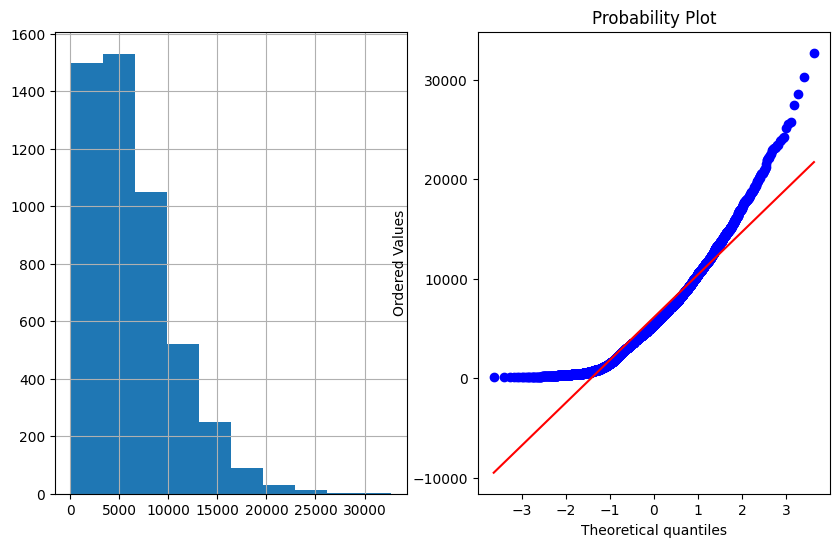

In [ ]:
tar1 = plot_data(training, 'Item_Store_Returns')
tar1

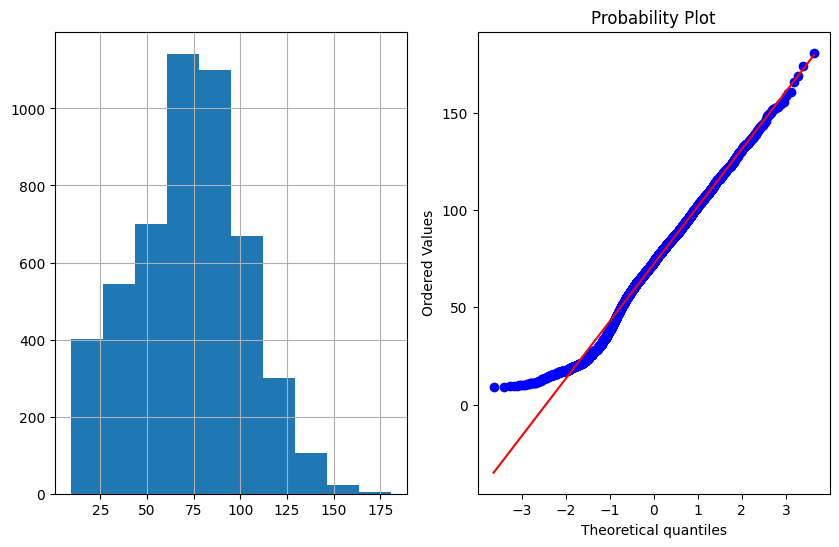

In [ ]:
tar2 = plot_data(training, 'Item_Store_Returns_sqrt')
tar2

In [ ]:
# Split the data
X_train = training.drop(['Item_Store_Returns_sqrt', 'Item_Store_Returns'], axis=1)
y_train = training['Item_Store_Returns_sqrt']

## Feature Selection

Identify the features with a variance of zero and remove it.

In [ ]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression, SelectKBest

In [ ]:
thres = VarianceThreshold(threshold=0)
thres.fit(X_train)
thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

There is no feature with a variance of zero.

Next, we identify features with high correlation to each other.

In [ ]:
# Create a correlation function
def correlation(df, threshold):
  col_corr = set()
  df_corr = df.corr()
  for i in range(len(df_corr.columns)):
    for j in range(i):
      if abs(df_corr.iloc[i,j]) > threshold:
        colname= df_corr.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
# Check correlation
corr_features = correlation(X_train, 0.80)
print(corr_features)

set()


In [ ]:
X_train = X_train.drop(corr_features, axis=1)
testing = testing.drop(corr_features, axis=1)

There is no feature with a high correlation with each other.

Next will be to identify features having a higher dependency by Information Gain (IG).

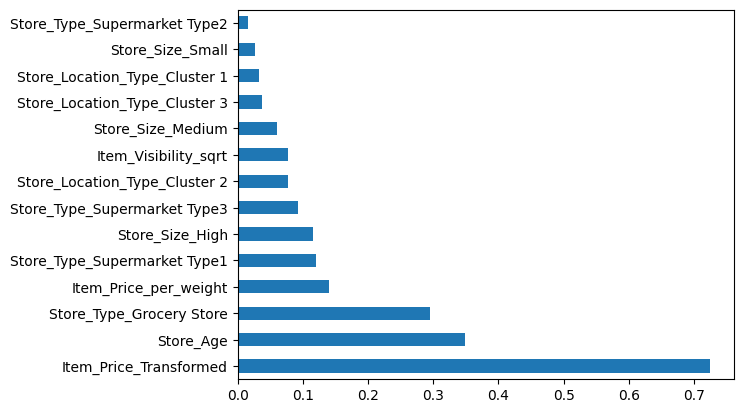

In [ ]:
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info = pd.Series(mutual_info, index=X_train.columns)
mutual_info.sort_values(ascending=False).plot(kind='barh')
plt.show()

We select the best 6 to build the model.

In [ ]:
sel = SelectKBest(mutual_info_regression, k=6)
sel.fit(X_train, y_train)
selected_features = X_train.columns[sel.get_support()]
X_train = X_train[selected_features]
testing = testing[selected_features]
X_train.head()

,Store_Age,Item_Price_Transformed,Item_Price_per_weight,Store_Size_High,Store_Type_Grocery Store,Store_Type_Supermarket Type1
Item_Store_ID,,,,,,
DRA12_BABATUNJI010,20,18.908728,5.551794,1.0,1.0,0.0
DRA12_BABATUNJI013,31,18.862396,5.538190,1.0,0.0,1.0
DRA12_BABATUNJI017,11,18.729389,5.499138,0.0,0.0,1.0
DRA12_BABATUNJI018,9,18.842505,5.532350,0.0,0.0,0.0
DRA12_BABATUNJI035,14,18.835870,5.530402,0.0,0.0,1.0


## Model Development

In [ ]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import root_mean_squared_error

In [ ]:
# Split the data into training and validation data
X_tra, X_val, y_tra, y_val = train_test_split(X_train, y_train, test_size= 0.2, random_state=42)

In [ ]:
# Instantiate the XGBoost model
model = xgb.XGBRegressor(objective= 'reg:squarederror', eval_metric='rmse')

# Tune the hyperparameters
params = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'learning_rate': np.arange(0.05, 1.05, 0.05),
    'subsample': np.arange(0.05, 1.05, 0.05),
    'max_depth': np.arange(3, 20, 1),
    'min_child_weight': np.arange(1, 20, 1)
}

xgb_cv = RandomizedSearchCV(estimator= model, param_distributions=params, n_iter= 70, n_jobs= -1,
                            verbose= 1, cv= 5, random_state=42, scoring= 'neg_mean_squared_error')

xgb_cv.fit(X_tra, y_tra)
print(xgb_cv.best_params_)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
{'subsample': np.float64(0.3), 'n_estimators': 200, 'min_child_weight': np.int64(12), 'max_depth': np.int64(3), 'learning_rate': np.float64(0.15000000000000002)}


In [ ]:
# Instantiate LightGB model
lgb_model = lgb.LGBMRegressor()

# Tune the hyperparameters
param_grid_lgb = {
    'max_depth': np.arange(3, 20, 1),
    'learning_rate': np.arange(0.05, 1.05, 0.05),
    'n_estimators': [100, 200, 300, 500, 1000],
    'min_child_samples': [10, 20, 30, 40, 50],
    'subsample': np.arange(0.05, 1.05, 0.05),
    'colsample_bytree': np.arange(0.05, 1.05, 0.05)
}

lgb_cv = RandomizedSearchCV(estimator= lgb_model, param_distributions= param_grid_lgb, n_iter= 70, n_jobs= -1,
                            verbose=1, cv= 5, random_state= 42, scoring= 'neg_mean_squared_error')

lgb_cv.fit(X_tra, y_tra)
print(lgb_cv.best_params_)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
{'subsample': np.float64(0.55), 'n_estimators': 100, 'min_child_samples': 20, 'max_depth': np.int64(4), 'learning_rate': np.float64(0.1), 'colsample_bytree': np.float64(0.7000000000000001)}


In [ ]:
# Base models
xgb_base = xgb.XGBRegressor(objective='reg:squarederror', n_estimators = 200, subsample= 0.3, max_depth= 3,
                             learning_rate= 0.15, min_child_weight= 12, eval_metric='rmse')
lgb_base = lgb.LGBMRegressor(n_estimators=100, subsample= 0.55, min_child_samples= 20, max_depth= 4,
                              learning_rate= 0.1, colsample_bytree= 0.7)

# Fit the base models
xgb_base.fit(X_tra, y_tra)
lgb_base.fit(X_tra, y_tra)


LGBMRegressor(colsample_bytree=0.7, max_depth=4, subsample=0.55)

In [ ]:
# Base models for ensemble
estimators = [
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror', n_estimators = 200, subsample= 0.3, max_depth= 3,
                             learning_rate= 0.15, min_child_weight= 12, eval_metric='rmse')),
    ('lgb', lgb.LGBMRegressor(n_estimators=100, subsample= 0.55, min_child_samples= 20, max_depth= 4,
                              learning_rate= 0.1, colsample_bytree= 0.7))
]


# Build the ensemble model
stack_model = StackingRegressor(estimators= estimators, final_estimator= lgb_base)
stack_model.fit(X_tra, y_tra)

# Predict the validation
y_val_pred = np.square(stack_model.predict(X_val))

## Model Evaluation

In [ ]:
val_score = root_mean_squared_error(np.square(y_val), y_val_pred)
print(f'The RMSE of  the Validation is {val_score}')

The RMSE of  the Validation is 2966.90586031667


Finally, we make prediction on the test data and save the result.

In [ ]:
prediction = np.square(stack_model.predict(testing))



In [ ]:
# Load the submission file
submit = pd.read_csv('/content/drive/MyDrive/Zindi/DSN AI Classes 2025/SampleSubmission.csv')
submit.head()

,Item_Store_ID,Item_Store_Returns
0,DRA59_BABATUNJI010,100
1,DRA59_BABATUNJI013,100
2,DRB01_BABATUNJI013,100
3,DRB13_BABATUNJI010,100
4,DRB13_BABATUNJI013,100


In [ ]:
# Create a dictionary for the prediction result
test_result = {
    'Item_Store_ID': testing.index,
    'Item_Store_Returns': prediction
}

# Set as a dataframe
result_df = pd.DataFrame(test_result)

# Set as a series
map_df = result_df.set_index('Item_Store_ID')['Item_Store_Returns']

# Using map to replace the values in the submission sample
submit['Item_Store_Returns'] = submit['Item_Store_ID'].map(map_df).fillna(submit['Item_Store_Returns'])
submit.head()

,Item_Store_ID,Item_Store_Returns
0,DRA59_BABATUNJI010,1427.628652
1,DRA59_BABATUNJI013,8009.920186
2,DRB01_BABATUNJI013,6667.062110
3,DRB13_BABATUNJI010,1247.746209
4,DRB13_BABATUNJI013,7415.331036


In [ ]:
# Save as a CSV file
submit.to_csv('Submission.csv', index= False)